# Project P2: Auto Encoder
---

Summary: 
- Perform basic unsupervised learning tasks using sklearn
- Apply unsupervised learning on PyRat datasets 

What is Autoencoder ?
--
An autoencoder is an artificial neural network used for unsupervised learning of efficient codings. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Recently, the autoencoder concept has become more widely used for learning generative models of data. Some of the most powerful AI in the 2010s involves stacking sparse autoencoders in a deep learning network.

<a href="https://en.wikipedia.org/wiki/Autoencoder">Source Wikipedia</a>

https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
    

Structure 
-- 
<img src="structure.png" alt="Structure"/>
<a href="https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798">Image Source</a>

An autoencoder always consists of two parts, the encoder and the decoder, which can be defined as transitions ${\displaystyle \phi }$  and  ${\displaystyle \psi ,}$  such that:

$${\displaystyle \phi :{\mathcal {X}}\rightarrow {\mathcal {F}}} (encoder)$$
$${\displaystyle \psi :{\mathcal {F}}\rightarrow {\mathcal {X}}} (decoder)$$ 
$${\displaystyle \phi ,\psi ={\underset {\phi ,\psi }{\operatorname {arg\,min} }}\,\|X-(\psi \circ \phi )X\|^{2}}$$ 
In the simplest case, where there is one hidden layer, the encoder stage of an autoencoder takes the input ${\displaystyle \mathbf {x} \in \mathbb {R} ^{d}={\mathcal {X}}}$  and maps it to ${\displaystyle \mathbf {z} \in \mathbb {R} ^{p}={\mathcal {F}}}$ :

${\displaystyle \mathbf {z} =\sigma (\mathbf {Wx} +\mathbf {b} )} $

This image ${\displaystyle \mathbf {z} }$  is usually referred to as code, latent variables, or latent representation. Here, ${\displaystyle \sigma }$  is an element-wise activation function such as a sigmoid function or a rectified linear unit. ${\displaystyle \mathbf {W} }$  is a weight matrix and ${\displaystyle \mathbf {b} }$  is a bias vector. After that, the decoder stage of the autoencoder maps ${\displaystyle \mathbf {z} }$  to the reconstruction ${\displaystyle \mathbf {x'} }$  of the same shape as ${\displaystyle \mathbf {x} }$ :

$${\displaystyle \mathbf {x'} =\sigma '(\mathbf {W'z} +\mathbf {b'} )} $$
where ${\displaystyle \mathbf {\sigma '} ,\mathbf {W'} ,{\text{ and }}\mathbf {b'} }$  for the decoder may differ in general from the corresponding ${\displaystyle \mathbf {\sigma } ,\mathbf {W} ,{\text{ and }}\mathbf {b} }$  for the encoder, depending on the design of the autoencoder.

Autoencoders are also trained to minimise reconstruction errors (such as squared errors):

$${\displaystyle {\mathcal {L}}(\mathbf {x} ,\mathbf {x'} )=\|\mathbf {x} -\mathbf {x'} \|^{2}=\|\mathbf {x} -\sigma '(\mathbf {W'} (\sigma (\mathbf {Wx} +\mathbf {b} ))+\mathbf {b'} )\|^{2}} $$
where ${\displaystyle \mathbf {x} }$  is usually averaged over some input training set.



Application on MNIST dataset :)
--
We'll use keras

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
import tqdm

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [54]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 45s 744us/step - loss: 0.1391
Epoch 2/5
60000/60000 [==============================] - 45s 747us/step - loss: 0.0985
Epoch 3/5
60000/60000 [==============================] - 43s 715us/step - loss: 0.0925
Epoch 4/5
60000/60000 [==============================] - 44s 732us/step - loss: 0.0901
Epoch 5/5
60000/60000 [==============================] - 44s 729us/step - loss: 0.0885


In [57]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 11
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == int(n/2):
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == int(n/2):
            ax.set_title('Reconstructed Images')
    plt.show()


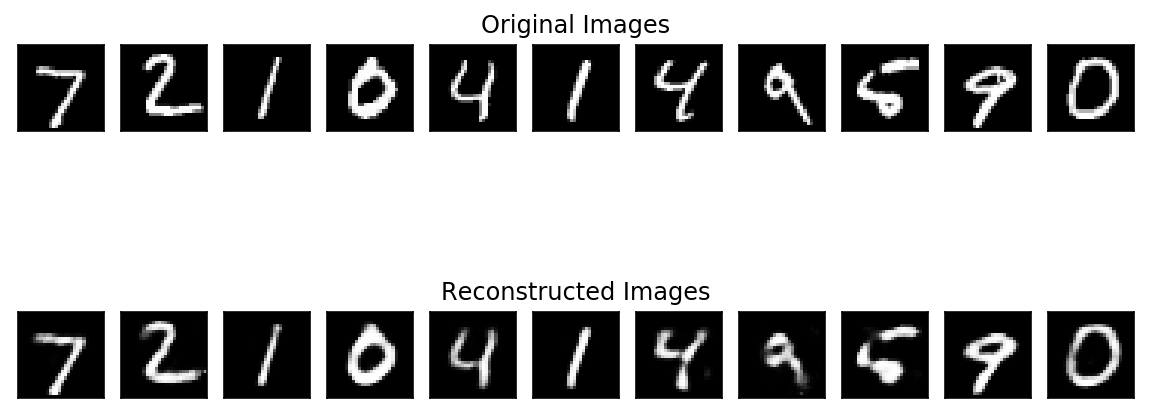

In [58]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))
#some examples

Now we calculate the error made by the autoencoder

In [60]:
autoencoder.evaluate(x_test, x_test)

10000/10000 [==============================] - 2s 235us/step


0.08711822583675384